In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv('./data/2_broad_category_training_data.csv')

In [3]:
training_data.head()

,assay_id,assay_type,description,label,bao_preferred_term,bao_id
0,868,B,"Inhibition of [3H]8-hydroxy-2-dipropylamino-1,...","Radioligand competition, displacement, binding",radioligand binding assay,BAO_0002776
1,2027,B,Displacement of [3H]-5-HT from human 5-hydroxy...,"Radioligand competition, displacement, binding",radioligand binding assay,BAO_0002776
2,2430,B,Inhibition constant for in vitro inhibition of...,"Radioligand competition, displacement, binding",radioligand binding assay,BAO_0002776
3,3306,B,Compound was evaluated for the binding affinit...,"Radioligand competition, displacement, binding",radioligand binding assay,BAO_0002776
4,3703,B,In vitro binding affinity by radioligand bindi...,"Radioligand competition, displacement, binding",radioligand binding assay,BAO_0002776


In [4]:
training_ids = set(training_data['assay_id'])

In [5]:
len(training_ids)

900

In [6]:
predictions = pd.read_csv('./chembl_35_broad_results_processed.txt', sep='\t')

In [7]:
predictions.head()

,assay_id,year,description,assay_type,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score
0,89,1994.0,Evaluated for its activity to inhibit rat live...,B,0.000141,0.020719,0.820549,0.000340,0.000403,0.000183,0.004031,Protein activity (BAO_0013016),0.820549,0.020719
1,235,2003.0,Inhibitory activity against inosine 5'-inosine...,B,0.000047,0.000101,0.760096,0.000034,0.368850,0.000012,0.003083,Protein activity (BAO_0013016),0.760096,0.368850
2,667,2003.0,5-hydroxytryptamine 1A receptor antagonism was...,F,0.749272,0.003896,0.000237,0.000165,0.005068,0.005397,0.000072,Radioligand binding (BAO_0002776),0.749272,0.005397
3,758,2001.0,Binding affinity towards human 5-hydroxytrypta...,B,0.001450,0.999711,0.000007,0.000063,0.000013,0.000615,0.000136,Binding (BAO_0002989),0.999711,0.001450
4,1155,1992.0,Compound was evaluated for in vitro binding af...,B,0.999998,0.000010,0.000030,0.001088,0.000005,0.000031,0.000692,Radioligand binding (BAO_0002776),0.999998,0.001088


In [8]:
predictions_nucleic = predictions.loc[predictions['predicted_cat']=='Nucleic acid binding']

In [9]:
len(predictions_nucleic)

17062

In [10]:
predictions_nucleic_no_training = predictions_nucleic.loc[~predictions_nucleic['assay_id'].isin(training_ids)]

In [11]:
len(predictions_nucleic_no_training)

16885

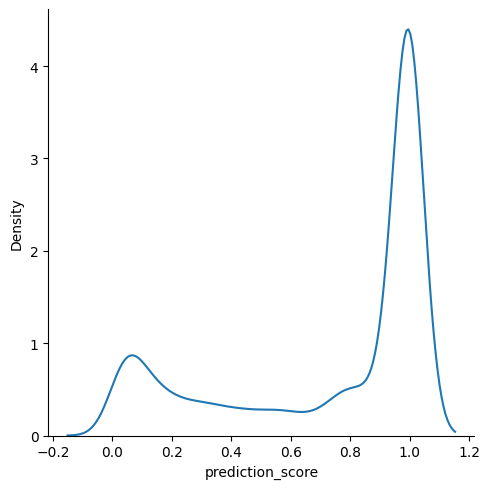

In [12]:
sns.displot(predictions_nucleic_no_training, x="prediction_score", kind='kde')

In [13]:
random_sample = predictions_nucleic_no_training.sample(n=50, random_state=372957)

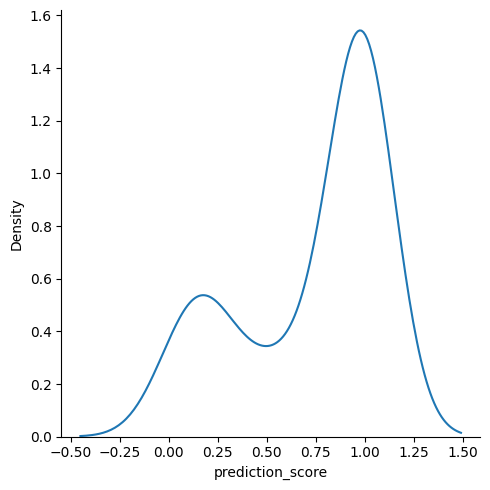

In [15]:
sns.displot(random_sample, x="prediction_score", kind='kde')

In [16]:
random_sample

,assay_id,year,description,assay_type,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score
729907,1505168,2015.0,Inhibition of c-Met (unknown origin) using pol...,B,0.000018,2.612155e-04,0.122288,2.669148e-05,3.189775e-04,0.513885,0.000028,Nucleic acid binding,0.513885,0.122288
73906,88549,1981.0,Tested for antibacterial effect against ILB at...,F,0.000231,4.688268e-05,0.022001,2.911600e-05,4.581467e-04,0.254264,0.064333,Nucleic acid binding,0.254264,0.064333
696985,601522,2009.0,Binding affinity to D16 ssDNA aptamer,B,0.000296,7.534883e-03,0.000022,2.956479e-05,7.325428e-05,0.986649,0.000071,Nucleic acid binding,0.986649,0.007535
333093,758330,2011.0,Binding affinity to calf thymus DNA assessed a...,B,0.000009,5.905873e-07,0.000003,1.187648e-06,4.461079e-07,0.999999,0.000005,Nucleic acid binding,0.999999,0.000009
632172,223277,1990.0,Association constant for binding to poly(dG-dC...,B,0.000008,1.781994e-06,0.000006,3.177881e-07,6.302106e-07,0.999999,0.000005,Nucleic acid binding,0.999999,0.000008
1006718,322546,2005.0,Seizure score before administration in rat 1 a...,F,0.039109,3.103214e-02,0.000849,1.330536e-02,2.302807e-04,0.040152,0.000910,Nucleic acid binding,0.040152,0.039109
474651,2292624,2016.0,Synergistic induction of DNA interstrand cross...,F,0.000015,2.864654e-05,0.002759,1.008901e-06,5.318034e-02,0.755768,0.000144,Nucleic acid binding,0.755768,0.053180
892408,2107639,2021.0,Inhibition of human DNMT3A (628 to 912 residue...,B,0.000170,3.996395e-05,0.000254,7.255713e-07,5.851142e-05,0.994136,0.000025,Nucleic acid binding,0.994136,0.000254
928726,1855250,2020.0,Inhibition of RNA-dependent RNA polymerase in ...,B,0.000098,5.609959e-06,0.057436,1.050480e-05,1.859259e-05,0.923156,0.000004,Nucleic acid binding,0.923156,0.057436
917070,763388,2011.0,Binding affinity to Escherichia coli pBR322 as...,B,0.000116,2.387996e-03,0.000063,2.146327e-06,5.103910e-04,0.996521,0.000060,Nucleic acid binding,0.996521,0.002388


In [17]:
random_sample.to_csv("nucleic_acid_binding_random_sample50.csv", index=False)